In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zb-da9-competition/Special_Sale_Calendar.csv
/kaggle/input/zb-da9-competition/ConsumerElectronics.csv
/kaggle/input/zb-da9-competition/NPS_Stockindex.csv
/kaggle/input/zb-da9-competition/Media Investment.csv


In [6]:
df_prom=pd.read_csv('/kaggle/input/zb-da9-competition/Special_Sale_Calendar.csv')
df_consumer=pd.read_csv('/kaggle/input/zb-da9-competition/ConsumerElectronics.csv')
df_nps=pd.read_csv('/kaggle/input/zb-da9-competition/NPS_Stockindex.csv')
df_investment=pd.read_csv('/kaggle/input/zb-da9-competition/Media Investment.csv')

/tmp/ipykernel_30/1150471255.py:2: DtypeWarning: Columns (6,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_consumer=pd.read_csv('/kaggle/input/zb-da9-competition/ConsumerElectronics.csv')


### special_sale_calendar 데이터 EDA

In [10]:
df_prom

,2015,2016
0,(18-19th July),(20-22 Jan)
1,(15-17th Aug),(1-2 Feb)
2,(28-30th Aug),(20-21 Feb)
3,(15-17th Oct),(14-15 Feb)
4,(7-14th Nov),(7-9 Mar)
5,(25th Dec'15 - 3rd Jan'16),(25-27 May)


In [41]:
df_nps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    2 non-null      object 
 1   July'15  2 non-null      float64
 2   Aug'15   2 non-null      float64
 3   Sept'15  2 non-null      float64
 4   Oct'15   2 non-null      float64
 5   Nov'15   2 non-null      float64
 6   Dec'15   2 non-null      float64
 7   Jan'16   2 non-null      float64
 8   Feb'16   2 non-null      float64
 9   Mar'16   2 non-null      float64
 10  Apr'16   2 non-null      float64
 11  May'16   2 non-null      float64
 12  June'16  2 non-null      float64
dtypes: float64(12), object(1)
memory usage: 336.0+ bytes


In [42]:
df_investment

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015,7,17.1,0.2,2.5,7.4,0.0,1.3,0.5,5.0,0.0,0.0
1,2015,8,5.1,0.0,1.3,1.1,0.0,0.1,0.1,2.5,0.0,0.0
2,2015,9,96.3,3.9,1.4,62.8,0.6,16.4,5.0,6.2,0.0,0.0
3,2015,10,170.2,6.1,12.6,84.7,3.4,24.4,7.0,31.9,0.0,0.0
4,2015,11,51.2,4.2,1.3,14.2,0.2,19.6,6.6,5.2,0.0,0.0
5,2015,12,106.7,5.4,3.1,56.7,1.1,22.5,6.8,11.2,0.0,0.0
6,2016,1,74.2,4.4,0.5,4.2,0.9,22.9,7.4,4.2,2.7,27.1
7,2016,2,48.1,2.6,1.9,11.7,0.6,19.9,6.5,4.9,0.0,0.0
8,2016,3,100.0,9.3,2.1,41.6,0.4,18.4,6.2,5.2,0.9,15.9
9,2016,4,56.8,5.2,0.9,24.3,0.0,16.5,5.7,4.2,0.0,0.0


In [7]:
df_prom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   2015    6 non-null      object
 1   2016    6 non-null      object
dtypes: object(2)
memory usage: 224.0+ bytes


In [8]:
df_consumer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   fsn_id                           1648824 non-null  object 
 1   order_date                       1648824 non-null  object 
 2   Year                             1648824 non-null  int64  
 3   Month                            1648824 non-null  int64  
 4   order_id                         1648824 non-null  float64
 5   order_item_id                    1648824 non-null  float64
 6   gmv                              1648824 non-null  object 
 7   units                            1648824 non-null  int64  
 8   deliverybdays                    1648824 non-null  object 
 9   deliverycdays                    1648824 non-null  object 
 10  s1_fact.order_payment_type       1648824 non-null  object 
 11  sla                              1648824 non-null 

In [18]:
df_consumer.head()


,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400,1,\N,\N,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [11]:
df_consumer.isnull().sum()

fsn_id                             0
order_date                         0
Year                               0
Month                              0
order_id                           0
order_item_id                      0
gmv                                0
units                              0
deliverybdays                      0
deliverycdays                      0
s1_fact.order_payment_type         0
sla                                0
cust_id                            0
pincode                            0
product_analytic_super_category    0
product_analytic_category          0
product_analytic_sub_category      0
product_analytic_vertical          0
product_mrp                        0
product_procurement_sla            0
dtype: int64

In [47]:
FSN ID	각 SKU의 고유 식별자 sku ->기업의 재고 시스템에서 각 제품에 할당된 고유 식별자
Order Date	주문이 이루어진 날짜
Year/Month	주문이 이루어진 연도 및 월
Order ID	각 주문의 고유 식별 번호
Order Item ID	동시에 두 가지 다른 제품을 주문할 때 시스템이 생성하는 두 개의 다른 주문 항목 ID
GMV	상품의 총 판매 가치 또는 수익
Units	특정 제품이 판매된 단위 수
deliverybdays	주문이 이루어진 날짜와 최종 배송일 사이의 영업일 수
deliverycdays	주문이 이루어진 날짜와 최종 배송일 사이의 달력 일 수
Order Payment Type	지불이 이루어진 방법(선불 또는 대금 상환)
SLA	제품을 배달하는 데 일반적으로 걸리는 일 수
Cust id	고객의 고유 식별자
pincode	주문이 이루어진 위치의 핀 코드
product_analytic_super_category	제품이 속한 슈퍼 카테고리
product_analytic_category	제품이 속한 카테고리
product_analytic_sub_category	제품이 속한 하위 카테고리
product_analytic_vertical	제품이 속한 최대 하위 분류
Product MRP	제품의 최대 소매 가격
Product procurement SLA	제품을 조달하는 데 일반적으로 걸리는 시간

SyntaxError: invalid syntax (1986827471.py, line 1)

### 매출 및 거래 분석: 판매 추이와 주요 기여 요인 분석
#### 목표: 특정 시점, 제품, 또는 고객군이 매출에 미치는 영향 파악
주요 분석 내용:

- 연도 및 월별 매출 분석: GMV와 Order Date를 활용해 계절적 또는 월별 매출 변동 파악
- 제품군별 매출 기여도: product_analytic_super_category, product_analytic_category로 주요 제품군 기여 파악
- SKU별 판매 분석: FSN ID와 Units를 통해 어떤 제품이 가장 많이 팔리는지 확인

In [19]:
df_consumer['gmv'] = pd.to_numeric(df_consumer['gmv'], errors='coerce')

<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='Month'>

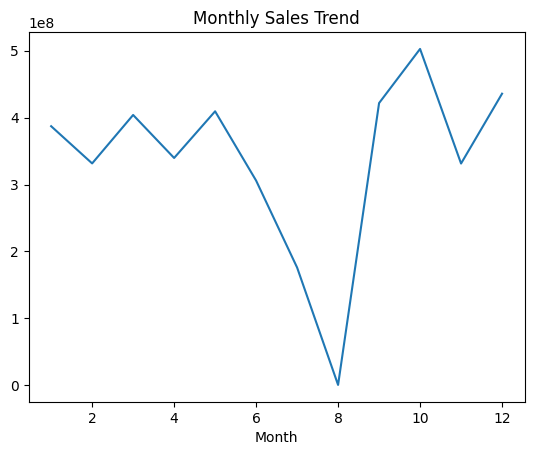

In [21]:
# 연도 및 월별 매출 추이 분석
df_consumer['order_date'] = pd.to_datetime(df_consumer['order_date'])
monthly_sales = df_consumer.groupby(df_consumer['Month'])['gmv'].sum()
monthly_sales.plot(kind='line', title='Monthly Sales Trend')

<Axes: title={'center': 'Sales by Category'}, xlabel='product_analytic_category'>

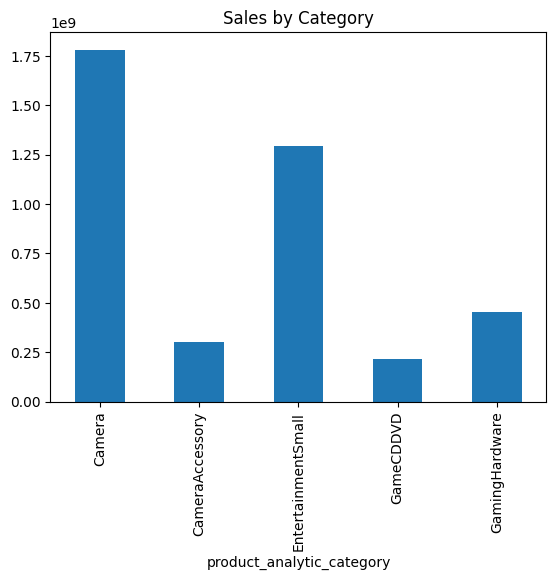

In [22]:
# 제품군별 매출 기여도 분석
category_sales = df_consumer.groupby('product_analytic_category')['gmv'].sum()
category_sales.plot(kind='bar', title='Sales by Category')

In [25]:

# SKU별 판매량 분석
sku_sales = df_consumer.groupby('fsn_id')['units'].sum().sort_values(ascending=False).head(10)
print(sku_sales)


fsn_id
ACCE6VGHYKYFX4WB    38947
SELDXMC3JNMTQMGV    18468
CAMDA6RJERF8HS4G    16909
ACCDXEGXG8HJUCSK    14377
ACCECYHH4QDNZXEX    13841
ACCE9C3WYBMPJ98R    13459
CAMDUGSSHXQ9FDHM    12811
ACCEBEMGQUZYJBKG    12382
ACCEBASUU3ZZRDYV    12333
ACCEBEMEWFSDJH72    11816
Name: units, dtype: int64


### 배송 및 서비스 수준 분석: 배송 지연과 고객 경험
#### 목표: 배송 시간(SLA) 준수 여부와 서비스 품질을 분석하여 고객 경험 개선

> 주요 분석 내용:

- 영업일 기준과 달력 일 기준의 배송 차이 분석: deliverybdays와 deliverycdays 비교
- SLA 초과 배송 분석: 배송이 SLA를 초과한 주문 비율 파악
- 핀 코드 기반 배송 분석: pincode를 활용해 지역별 배송 시간과 서비스 품질 차이 파악

In [28]:
df_consumer['deliverycdays'] = pd.to_numeric(df_consumer['deliverycdays'], errors='coerce')

In [30]:
# 배송 시간 분석 (SLA 대비 실제 배송일 비교)
df_consumer['SLA_Difference'] = df_consumer['deliverycdays'] - df_consumer['sla']
sla_violations = df_consumer[df_consumer['SLA_Difference'] > 0]

# SLA 위반 비율 확인
sla_violation_rate = len(sla_violations) / len(df_consumer) * 100
print(f'SLA 위반 비율: {sla_violation_rate:.2f}%')

SLA 위반 비율: 7.27%


In [33]:
df_consumer['deliverybdays'] = pd.to_numeric(df_consumer['deliverybdays'], errors='coerce')

In [36]:
df_consumer['pincode'].value_counts()

pincode
-9031043207091489792.0     7743
-977901032130400000.0      6989
 -9.03104320709149E+018    5763
 -9.779010321304E+017      5066
                           4904
                           ... 
 8896561020835489792.0        1
 7379859965751770112.0        1
 7206650407951519744.0        1
-841869094098956032.0         1
 4.633024622955E+018          1
Name: count, Length: 12973, dtype: int64

### 고객 충성도 및 구매 패턴 분석: 고객 재구매와 지불 유형 분석
#### 목표: 고객 충성도와 지불 방식이 매출에 미치는 영향을 분석
> 주요 분석 내용:

- 고객별 구매 빈도와 총 매출: Cust id를 활용해 가장 가치 있는 고객군 파악
- 재구매 비율 분석: 고객의 재구매 여부 파악 및 충성도 예측
- 지불 방식 분석: Order Payment Type별 매출 차이 분석 (선불 vs 대금 상환)

In [39]:
# 고객별 총 구매 횟수와 매출 분석
customer_sales = df_consumer.groupby('cust_id')['gmv'].agg(['sum', 'count'])
customer_sales.columns = ['Total GMV', 'Purchase Count']
print(customer_sales.sort_values(by='Total GMV', ascending=False).head(10))

                         Total GMV  Purchase Count
cust_id                                           
 -7.64158400471362E+018  2227654.0              54
 7.85432421404894E+018   1560780.0              38
-1298057068129600000.0    880797.0              62
-2971516803444340224.0    674886.0             114
 7316608159543780352.0    664767.0              17
 329384659914441984.0     637818.0              19
-1049993156656669952.0    560396.0              41
 7695113973115190272.0    547690.0              37
 3882778923185529856.0    533971.0              19
 793643703800669952.0     526903.0              24


In [40]:
# 재구매 고객 비율 확인
repeat_customers = customer_sales[customer_sales['Purchase Count'] > 1]
repeat_rate = len(repeat_customers) / len(customer_sales) * 100
print(f'재구매 고객 비율: {repeat_rate:.2f}%')


재구매 고객 비율: 21.46%


<Axes: title={'center': 'Sales by Payment Type'}, xlabel='s1_fact.order_payment_type'>

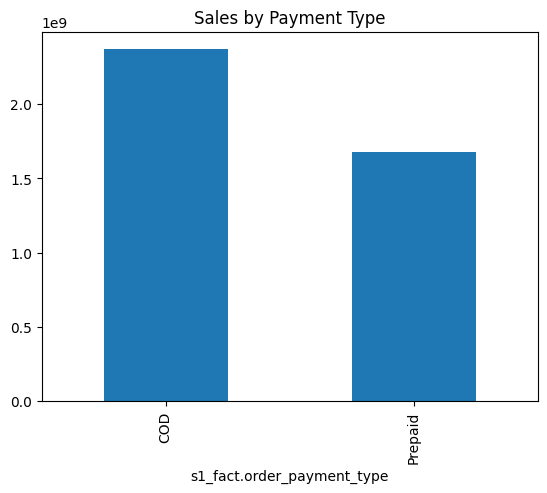

In [43]:
# 지불 방식별 매출 비교
payment_sales = df_consumer.groupby('s1_fact.order_payment_type')['gmv'].sum()
payment_sales.plot(kind='bar', title='Sales by Payment Type')

### 가격 및 할인 분석: 가격 민감도와 할인 전략 평가
#### 목표: 제품의 가격 정책이 매출에 미치는 영향 분석
> 주요 분석 내용:

- MRP와 GMV 비교: Product MRP와 GMV를 활용해 할인율 분석
- 조달 SLA와 매출 관계 분석: Product procurement SLA가 긴 제품의 매출 성과 분석
- 할인 전략 평가: 특정 할인율에 따른 판매량 증가 분석

/tmp/ipykernel_30/4143637646.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_sales = df_consumer.groupby(pd.cut(df_consumer['Discount Rate'], bins=[0, 10, 20, 30, 100]))['gmv'].sum()


<Axes: title={'center': 'Sales by Discount Rate'}, xlabel='Discount Rate'>

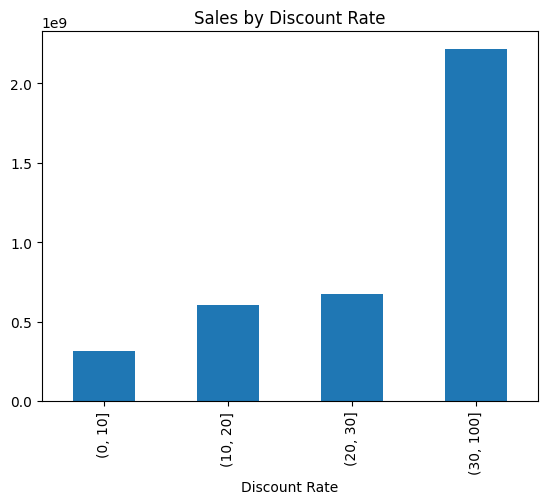

In [44]:
# 할인율 계산 및 분석
df_consumer['Discount Rate'] = (df_consumer['product_mrp'] - df_consumer['gmv']) / df_consumer['product_mrp'] * 100
discount_sales = df_consumer.groupby(pd.cut(df_consumer['Discount Rate'], bins=[0, 10, 20, 30, 100]))['gmv'].sum()
discount_sales.plot(kind='bar', title='Sales by Discount Rate')

<Axes: title={'center': 'Average GMV by Procurement SLA'}, xlabel='product_procurement_sla'>

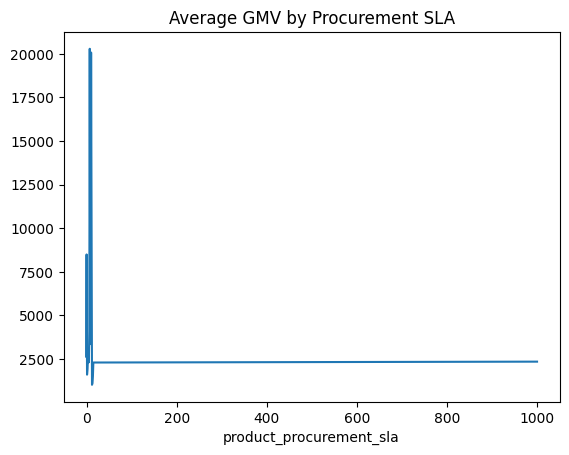

In [46]:
# 조달 SLA와 매출 관계 분석
procurement_sales = df_consumer.groupby('product_procurement_sla')['gmv'].mean()
procurement_sales.plot(kind='line', title='Average GMV by Procurement SLA')

## 간단한 EDA를 통한 분석주제 고려
> 매출 및 제품군 분석:

- "어떤 제품이 매출에 가장 큰 기여를 하는가?"
- "월별 매출이 어떻게 변동하며, 특정 시즌에 집중되는가?"

> 배송 성과 및 SLA 분석:

- "SLA를 준수하지 못하는 지역은 어디인가?"
- "배송 시간이 매출에 미치는 영향은 무엇인가?"

> 고객 충성도 및 구매 행동 분석:

- "재구매 비율이 높은 고객의 특성은 무엇인가?"
- "어떤 지불 유형이 고객 충성도와 매출에 긍정적인 영향을 미치는가?"

> 가격 민감도 및 할인 분석:

- "어떤 할인율에서 가장 높은 매출을 기록하는가?"
- "조달 시간이 긴 제품의 매출 성과는 어떠한가?"


### 크게 3가지로 주제 분류가능할거같스빈다
- 고객관련해서 수행할수있는 스토리 -> 재구매 비율, 지불유형에 따라 